In [1]:
!pip install sklearn 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#a.import library 
import matplotlib.pyplot as plt
import pandas as pd             # pip install pandas
import numpy as np 

pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',10000)

#b. Read Dataset into Dataframe
df= pd.read_excel('analytics_assignment_data.xlsx',index_col = 4) #reading dataset


#c.Cleansing 
df.drop('GO-TIX',inplace=True) #drop Go-tix
df=df[df['order_status']=='Cancelled'] #keep Canceled 
df.reset_index(drop=False,inplace=True) #reset index


date = df['date'].unique()  #Keep Cartesian Product 
service = df['service'].unique()
merge =pd.DataFrame([[l,n] for l in date for n in service])
merge.columns=['date','service']

df = df.merge(merge,how='right',left_on=['date','service'],right_on =['date','service'])
df.replace(np.nan,0,inplace=True) #impute missing values with 0 


#extract time
df['months'] = df.date.dt.month 
df['day'] = df.date.dt.day
df['day_names'] = df.date.dt.day_name()
df['is_weekend'] = df['day_names'].apply(lambda x:1 if x in ['Saturday','Sunday']else 0)

#one-hot encode all predictor
day_of_month = pd.get_dummies(df.months)
month = df.date.dt.month 
day_of_week = pd.get_dummies(df.day_names)
is_weekend_1 = df['day_names'].apply(lambda x:1 if x in ['Saturday','Sunday']else 0)

#concat forecast data with one hot encoder 
forecast= pd.concat([df,day_of_month,day_of_week],axis=1)
forecast=forecast[forecast['date'].isin(['2016-03-30', '2016-03-31','2016-04-01'])]

#Standardize all predictors into z-score 
predictors = pd.concat([day_of_month,month, day_of_week, is_weekend_1],axis=1)
predictors.rename(columns = {'date':'months_1','day_names':'is_weekend_1'},inplace=True)

# #QUESTION1 
# Q1= gofood_1[gofood_1['date']=='2016-02-28']
# Q1.to_excel('Q1.xlsx')



# Q2 = pd.DataFrame(predictors.head(6))
# Q2.to_excel('Q2_1_1.xlsx')

for column in predictors.columns:
    predictors[column]=(predictors[column]-predictors[column].mean())/predictors[column].std()

#concat with train dataset 
train = pd.concat([df,predictors],axis=1)
train = train[(train['date']<'2016-03-30')| (train['date']>'2016-04-01')]


# Q2_1 = pd.DataFrame(predictors.head(6))
# Q2_1.to_excel('Q2_1_1.xlsx')

# #Q3 
# Q3 = pd.DataFrame(gokilat_1.sort_values(by='date').head(6))
# Q3.to_excel('Q3.xlsx')
    

In [4]:
#train and forecast data 
def file(name):
    new_file =train[train['service']==name].drop(['service','order_status','day_names'],axis =1).set_index('date')
    return new_file

gobox_t = file('GO-BOX')
goclean_t = file('GO-CLEAN')
gofood_t = file('GO-FOOD')
goglam_t = file('GO-GLAM')
gokilat_t = file('GO-KILAT')
gomart_t = file('GO-MART')
gomass_t = file('GO-MASSAGE')
goride_t = file('GO-RIDE')
gosend_t = file('GO-SEND')
goshop_t = file('GO-SHOP')

def file2(name):
    new_file2 =forecast[forecast['service']==name].drop(['service','order_status','day_names'],axis =1).set_index('date')
    return new_file2

gobox_f= file2('GO-BOX')
goclean_f = file2('GO-CLEAN')
gofood_f = file2('GO-FOOD')
goglam_f = file2('GO-GLAM')
gokilat_f = file2('GO-KILAT')
gomart_f = file2('GO-MART')
gomass_f = file2('GO-MASSAGE')
goride_f = file2('GO-RIDE')
gosend_f = file2('GO-SEND')
goshop_f = file2('GO-SHOP')



In [5]:
#MODELLING 

#define MAPE function 
def mape(actual,pred):
    mape = np.mean(np.abs((actual-pred)/actual))*100
    return mape


In [6]:
#split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(gobox_f,gobox_f.total_cbv, 
                                                   test_size=0.1,shuffle=False)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service =['GO-BOX']
mape_final =[f"{mape(y_true, y_pred)}%"]

<Figure size 864x432 with 0 Axes>

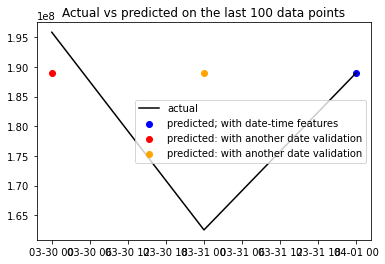

In [7]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(gobox_f.index, gobox_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(gobox_f.index[0],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(gobox_f.index[1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('gobox.png',dpi=fig.dpi)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(goclean_f,goclean_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-CLEAN')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

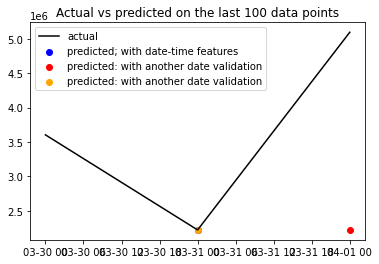

In [9]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(goclean_f.index, goclean_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(goclean_f.index[-1],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(goclean_f.index[1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('goclean.png',dpi=fig.dpi)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(gofood_f,gofood_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-FOOD')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

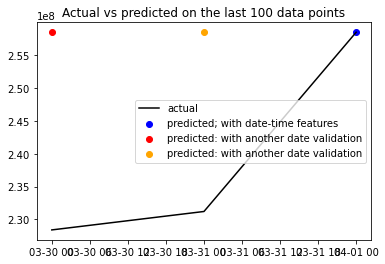

In [11]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(gofood_f.index, gofood_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(gofood_f.index[0],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(gofood_f.index[1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('gofood.png',dpi=fig.dpi)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(goglam_f,goglam_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-GLAM')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

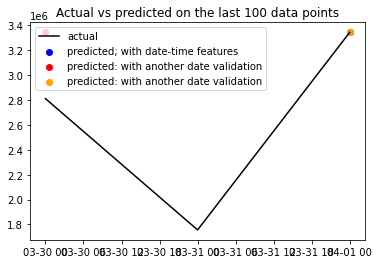

In [13]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(goglam_f.index, goglam_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(goglam_f.index[0],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(goglam_f.index[-1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('goglam.png',dpi=fig.dpi)

In [14]:
#gokilat 
X_train, X_test, y_train, y_test = train_test_split(gokilat_f,gokilat_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-KILAT')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

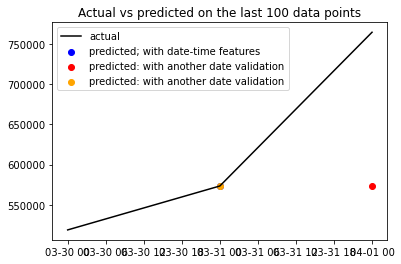

In [15]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(gokilat_f.index, gokilat_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(gokilat_f.index[-1],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(gokilat_f.index[1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('gokilat.png',dpi=fig.dpi)

In [16]:
#gomart 

X_train, X_test, y_train, y_test = train_test_split(gomart_f,gomart_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-MART')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

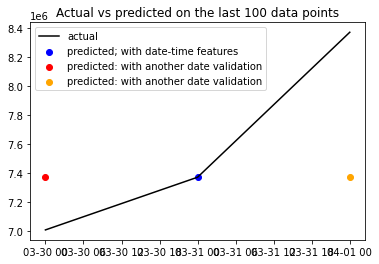

In [17]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(gomart_f.index, gomart_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(gomart_f.index[0],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(gomart_f.index[-1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('gomart.png',dpi=fig.dpi)

In [18]:
#gomass 

X_train, X_test, y_train, y_test = train_test_split(gomass_f,gomass_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-MASS')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

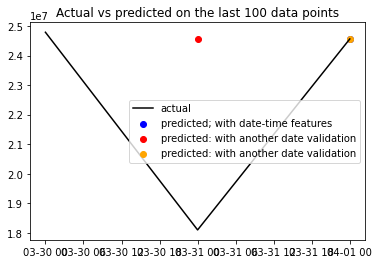

In [19]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(gomass_f.index, gomass_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(gomass_f.index[1],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(gomass_f.index[-1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('gomassage.png',dpi=fig.dpi)

In [20]:
#goride 

X_train, X_test, y_train, y_test = train_test_split(goride_f,goride_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-RIDE')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

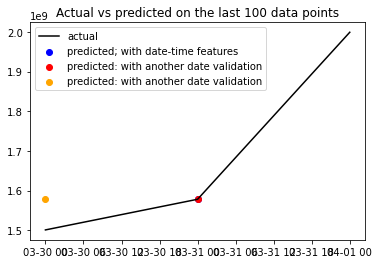

In [21]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(goride_f.index, goride_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(goride_f.index[1],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(goride_f.index[0],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('goride.png',dpi=fig.dpi)

In [22]:

X_train, X_test, y_train, y_test = train_test_split(gosend_f,gosend_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-SEND')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

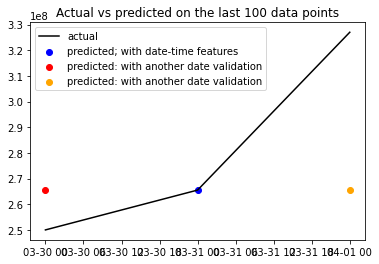

In [23]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(gosend_f.index, gosend_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(gosend_f.index[0],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(gosend_f.index[-1],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('gosend.png',dpi=fig.dpi)

In [24]:

X_train, X_test, y_train, y_test = train_test_split(goshop_f,goshop_f.total_cbv, 
                                                   test_size=0.1)

lr = LinearRegression().fit(X_train,y_train)
y_true = y_test 
y_pred = lr.predict(X_test)

service.append('GO-SHOP')
mape_final.append(f"{mape(y_true, y_pred)}%")

<Figure size 864x432 with 0 Axes>

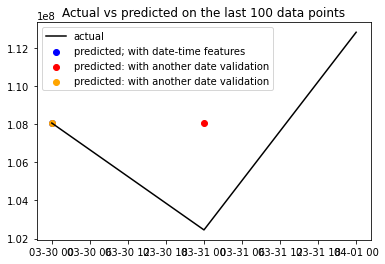

In [25]:
fig=plt.figure(figsize=(12,6))
fig,ax = plt.subplots()

ax.plot(goshop_f.index, goshop_f.total_cbv, color='black',  label = 'actual')
ax.scatter(X_test.index,y_pred, color='blue', label = 'predicted; with date-time features')
ax.scatter(goshop_f.index[1],y_pred,color = 'red',label = 'predicted: with another date validation')
ax.scatter(goshop_f.index[0],y_pred,color = 'orange',label = 'predicted: with another date validation')
plt.legend()
plt.title('Actual vs predicted on the last 100 data points')
plt.draw()

fig.savefig('goshop.png',dpi=fig.dpi)

In [26]:
my_dict ={'service':service,'mape':mape_final}

# Build a DataFrame cars from my_dict: cars
mape= pd.DataFrame(my_dict)
mape_sorted = mape.sort_values('mape',ascending=True).reset_index(drop=True)

#Q4
mape_sorted.to_excel('Q4.xlsx')